<a href="https://colab.research.google.com/github/G-forcemole/customer-churn-prediction/blob/main/02_modeling_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hello! this project is currently under construction.

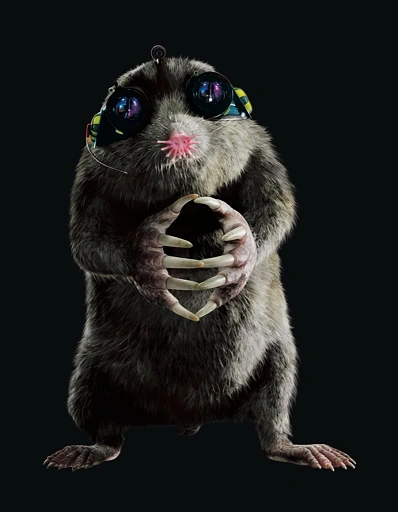

# **Churn Prediction Modeling**

The objective of this notebook is to build and evaluate a predictive model for customer churn.  
Using insights from exploratory data analysis, this notebook focuses on feature preparation, model training, and evaluation, with an emphasis on interpretability and business relevance.

In [1]:
# IMPORTS & LIBRARIES

import pandas as pd
import numpy as np

#scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

## **Data Loading**
We use a preprocessed CSV for this modeling notebook.  
The file is uploaded to the notebook environment and loaded into Google Colab for analysis.



**Note:**  If the preprocessed CSV is not available locally, it can be downloaded from the `data/processed` directory in the GitHub repository. <a href ="https://github.com/G-forcemole/customer-churn-prediction">GitHub</a>

In [3]:
# Loading the CSV into a data frame
df = pd.read_csv("telco_customer_churn_clean.csv")

In [4]:
shpe = df.shape
print(f"The data frame has {shpe[0]} rows and {shpe[1]} columns.")
print("\n")
df.info()

The data frame has 7043 rows and 22 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerid          7043 non-null   object 
 1   is_male             7043 non-null   object 
 2   is_senior           7043 non-null   object 
 3   has_partner         7043 non-null   object 
 4   has_dependents      7043 non-null   object 
 5   tenure              7043 non-null   int64  
 6   has_phone_service   7043 non-null   object 
 7   has_multiple_lines  6361 non-null   object 
 8   internetservice     7043 non-null   object 
 9   has_internet        7043 non-null   object 
 10  onlinesecurity      5517 non-null   object 
 11  onlinebackup        5517 non-null   object 
 12  deviceprotection    5517 non-null   object 
 13  techsupport         5517 non-null   object 
 14  streamingtv         5517 non-null   object 
 15  streamin

**Removing Customers who just joined and have not yet been charged.**

In [5]:
# Number of Null values in each column
df.isna().sum().sort_values(ascending=False)

,0
streamingtv,1526
streamingmovies,1526
onlinesecurity,1526
onlinebackup,1526
deviceprotection,1526
techsupport,1526
has_multiple_lines,682
totalcharges,11
tenure,0
has_dependents,0


In [6]:
# Dropped customers who have not yet been charged
df = df.dropna(subset=["totalcharges"])

In [7]:
# No more customers with Null charges
df.isna().sum().loc[["totalcharges"]]

,0
totalcharges,0


## Dataset spliting and Encoding



In [8]:
# 1 = churned customer | 0 = non-churned customer
y = df["churn"].map({"t": 1, "f": 0})

In [9]:
# Removed churn column from paramaters so there is no data leak during training
X = df.drop(columns=["churn"])

**Splitting categorical and numeric features**

In [10]:
categorical_features = X.select_dtypes(include="object").columns.tolist()
numeric_features = X.select_dtypes(exclude="object").columns.tolist()

In [11]:
print("Numeric Features: \n \n",numeric_features,sep="")
print("\n\nCategorical Features: \n \n", categorical_features, sep = "")

Numeric Features: 
 
['tenure', 'monthlycharges', 'totalcharges']


Categorical Features: 
 
['customerid', 'is_male', 'is_senior', 'has_partner', 'has_dependents', 'has_phone_service', 'has_multiple_lines', 'internetservice', 'has_internet', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'is_paperless', 'paymentmethod']


In [12]:


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features)
    ]
)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=5, # my lucky number
    stratify=y
)

In [14]:
log_reg = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(max_iter=5000))
    ]
)

In [15]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['customerid', 'is_male',
                                                   'is_senior', 'has_partner',
                                                   'has_dependents',
                                                   'has_phone_service',
                                                   'has_multiple_lines',
                                                   'internetservice',
                                                   'has_internet',
                                                   'onlinesecurity',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'techsupport', 'streamingtv',
                                                   'streamingmovies',
                                                   'contract', 'is_paperless',
                                                   'paymentmethod']),
                                                 ('num', StandardScaler(),
                                                  ['tenure', 'monthlycharges',
                                                   'totalcharges'])])),
                ('model', LogisticRegression(max_iter=5000))])

## Validation

In [16]:
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


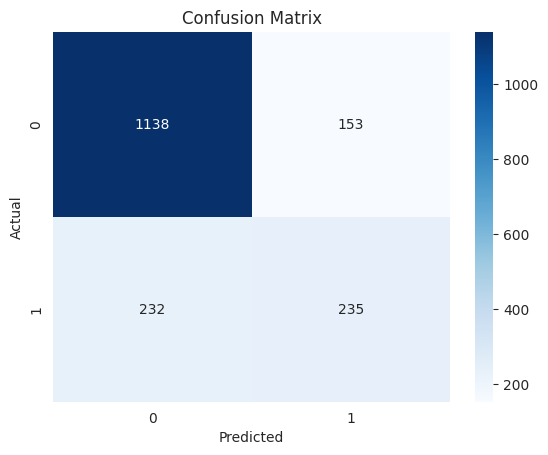

In [17]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix summarizes model performance across churn and non-churn classes.  
False negatives represent customers who churned but were not identified by the model, which is particularly costly in churn prevention contexts.

In [18]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1291
           1       0.61      0.50      0.55       467

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.77      1758



In [19]:
roc_auc = roc_auc_score(y_test, y_proba)
roc_auc

np.float64(0.8433563278636317)

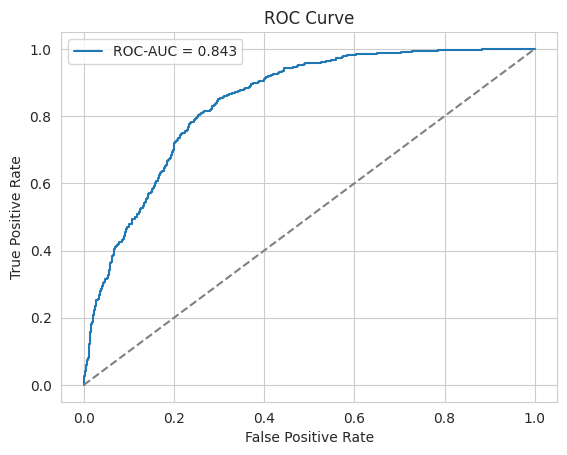

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()